In [16]:
# Подключаем необходимые для работы библиотеки
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Добавляем наш датасет в переменную df.
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Перечень и описание столбцов датасета:

Survived - выжил (1-да, 0- нет)
Pclass - Класс круиза
Name - ФИО
Sex - Пол
Age - Возраст
SibSp - число братьев, сестер или супругов на борту у человека
Parch - количество родителей или детей, с которыми путешествовал каждый пассажир
Ticket - Номер билета
Fare - Цена билета
Cabin - Номер каюты
Embarked - Порт посадки

In [6]:
# Проверяем есть ли в нашем датасете пустые данные и выводим их количество.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Удаляем эти пустые данные сохраняя результат в переменную "K"
k = df.fillna(method = 'ffill')

In [8]:
# Одна ячейка осталась пустой, видимо нет перед ней данных откуда можно взять информацию (ffill), ее просто удаляем.
k.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [9]:
k = k.dropna()
k.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
# Выводим все категории и количество уникальных значений каждой из категории
category_cols = df.select_dtypes(include=['object']) #выбрали столбцы с категориальными переменными
category_cols_names = category_cols.columns.tolist()
print(f'Список категорий: {category_cols_names}\n')
for col in category_cols_names:
    print(f'информация о столбце категории - {col}:')
    print(f'количество уникальных значений: {category_cols[col].nunique()}')

Список категорий: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

информация о столбце категории - Name:
количество уникальных значений: 891
информация о столбце категории - Sex:
количество уникальных значений: 2
информация о столбце категории - Ticket:
количество уникальных значений: 681
информация о столбце категории - Cabin:
количество уникальных значений: 147
информация о столбце категории - Embarked:
количество уникальных значений: 3


In [11]:
# Также выводим максимальные и минимальные значения числовых столбцов.
category_int = df.select_dtypes(include=['int64','float64'])
category_int_names = category_int.columns.tolist()
print(f'Столбцы с числовыми значениями: {category_int_names}\n')

for col in category_int_names:
    print(f'информация по столбцу {col}:')
    print(f'максимум: {category_int[col].max()}')
    print(f'минимум: {category_int[col].min()}')

Столбцы с числовыми значениями: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

информация по столбцу PassengerId:
максимум: 891
минимум: 1
информация по столбцу Survived:
максимум: 1
минимум: 0
информация по столбцу Pclass:
максимум: 3
минимум: 1
информация по столбцу Age:
максимум: 80.0
минимум: 0.42
информация по столбцу SibSp:
максимум: 8
минимум: 0
информация по столбцу Parch:
максимум: 6
минимум: 0
информация по столбцу Fare:
максимум: 512.3292
минимум: 0.0


<Axes: xlabel='Survived', ylabel='count'>

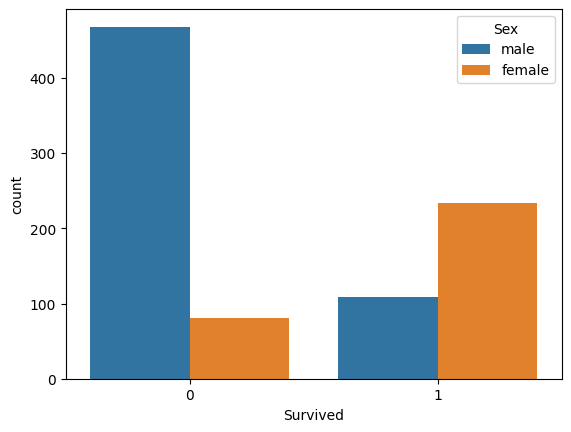

In [12]:
# Проведем анализ всех данных столбцов по отношению к "Survived" и понаблюдаем зависимости.
sb.countplot(x='Survived', hue='Sex', data=df)
# Пассажиров женского пола выжило в 2 раза больше чем мужского

<Axes: xlabel='Survived', ylabel='count'>

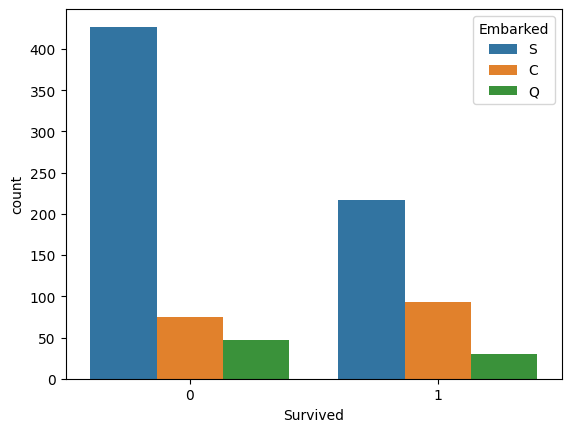

In [13]:
sb.countplot(x='Survived', hue='Embarked', data=df)
# Выживаемость пассажиров с порта S оказалась больше всего.

<Axes: xlabel='Survived', ylabel='count'>

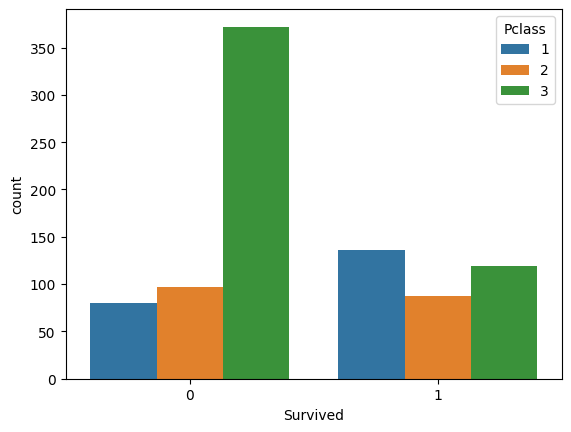

In [14]:
sb.countplot(x='Survived', hue='Pclass', data=df)
# В 3 классе жертв превышает в несколько раз по сравнению с 1 и 2.

<ipython-input-17-c32ed9df73b9>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sb.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)


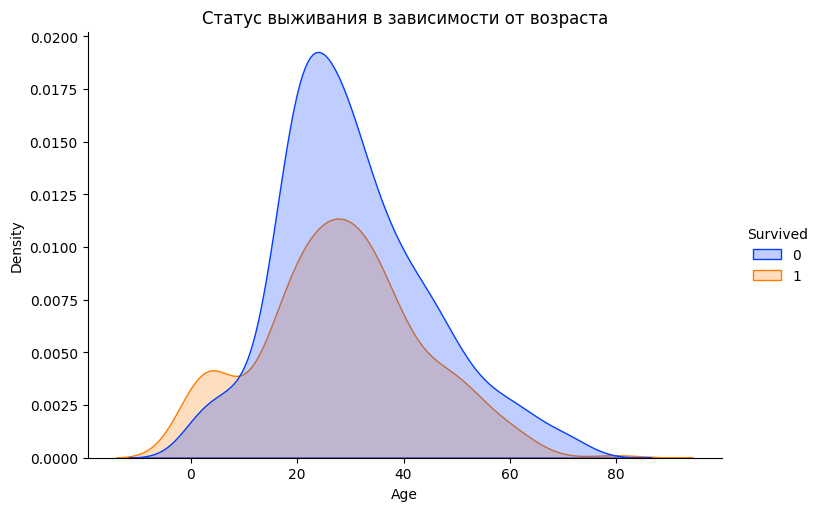

In [17]:
sb.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Статус выживания в зависимости от возраста')
plt.show()
# Людей среднего возраста 25-35 выжило больше всего.

<ipython-input-18-849925b9f7fe>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sb.displot(data=df, x='SibSp', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)


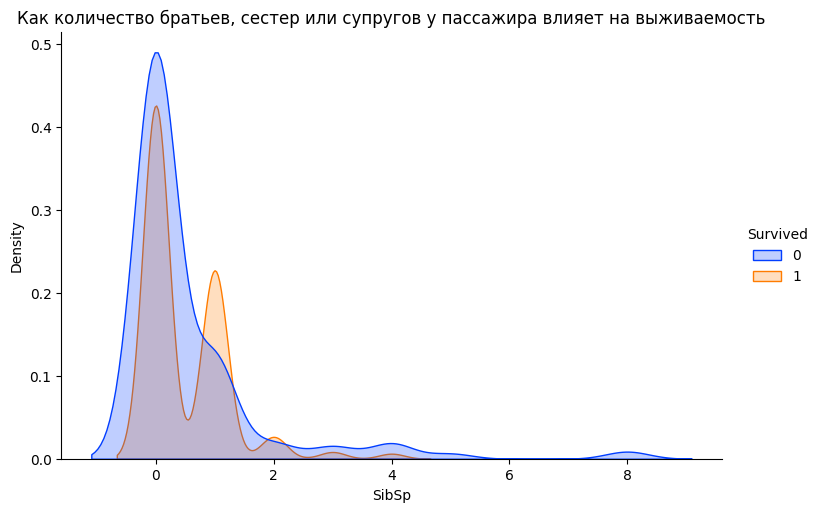

In [18]:
sb.displot(data=df, x='SibSp', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Как количество братьев, сестер или супругов у пассажира влияет на выживаемость')
plt.show()
# С ростом количества уменьшается шанс выживания.

<ipython-input-21-42770d9f259e>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sb.displot(data=df, x='Parch', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)


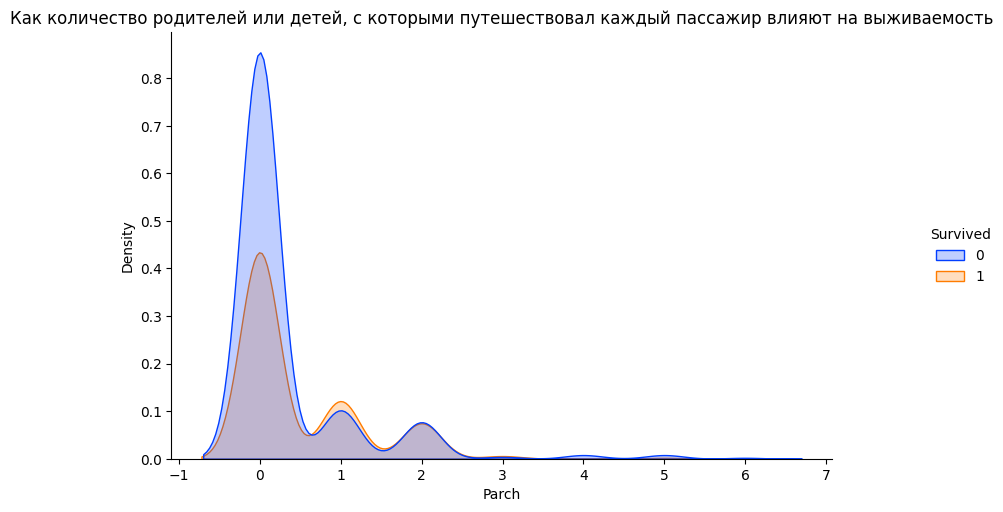

In [21]:
sb.displot(data=df, x='Parch', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Как количество родителей или детей, с которыми путешествовал каждый пассажир влияют на выживаемость')
plt.show()
# Здесь точно также, чем больше родственников на борту, тем сложнее выжить самому.

<ipython-input-20-ce53e71b0e21>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)


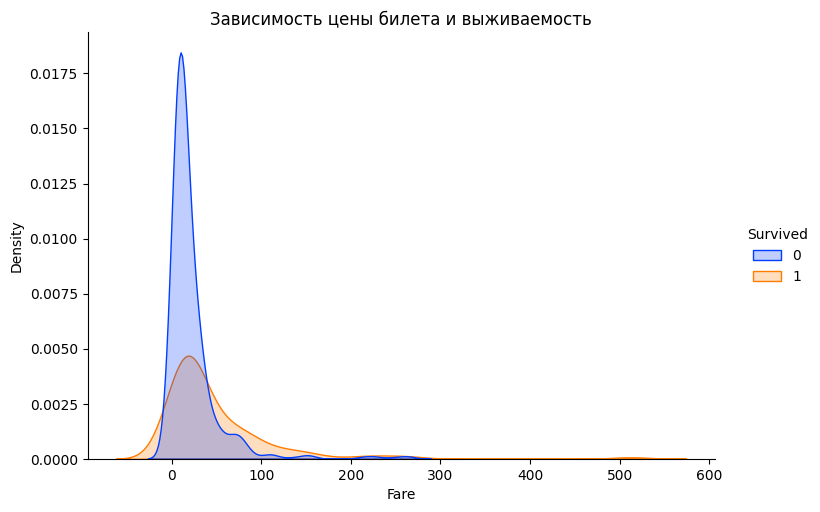

In [20]:
# И последний столбец для анализа.
sb.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sb.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Зависимость цены билета и выживаемость')
plt.show()
# Здесь явно дешевые билеты сыграли огромную роль выживания. Я думаю связано с расположением кают на корабле.